In [1]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statannot


matplotlib.rcParams['font.sans-serif'] = "Arial"
sns.set(style="whitegrid", font_scale=1, color_codes=True, palette="colorblind", rc={"grid.linestyle": "dotted", "axes.linewidth": 0.6})

In [2]:
imf = pd.read_csv("/home/marcc/AXLomics/msresist/data/Validations/IF/IF_YAP_TranslocationRatio_combined.csv").drop("Unnamed: 5", axis=1)
imf.insert(0, "Condition", [c + "-" + t for c, t in list(zip(list(imf["Cell Line"]), list(imf["Treatment"])))])
imf = imf.rename(columns={"Math_logNucbyCyto":"log(N/C intensity ratio)"})
imf.head()

,Condition,Cell Line,Treatment,ImageNumber,ObjectNumber,log(N/C intensity ratio)
0,WT-UT,WT,UT,1,1,0.476768
1,WT-UT,WT,UT,1,2,0.114580
2,WT-UT,WT,UT,1,3,0.011402
3,WT-UT,WT,UT,1,4,0.095866
4,WT-UT,WT,UT,1,5,0.122141


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

UT_WT v.s. UT_AXL KO: t-test independent samples with Bonferroni correction, P_val=1.648e-214 stat=3.656e+01
E_WT v.s. EA_WT: t-test independent samples with Bonferroni correction, P_val=3.145e-11 stat=-6.955e+00
E_AXL KO v.s. EA_AXL KO: t-test independent samples with Bonferroni correction, P_val=7.703e-05 stat=-4.285e+00


(<AxesSubplot: xlabel='Treatment', ylabel='log(N/C intensity ratio)'>,
  <statannot.StatResult.StatResult at 0x7ff516e5be80>])

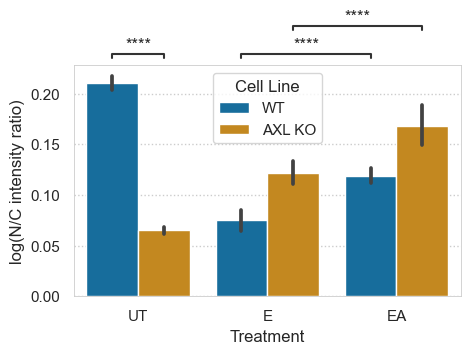

In [19]:
# sns.stripplot(imf, x="Condition", y="log( Nuclear / Cytosolic intensity ratio)", order=["WT-UT", "AXL KO-UT", "WT-E", "WT-EA"], marker="o", edgecolor='#373737')
# imf_ut = imf.set_index("Condition").loc[["WT-UT", "AXL KO-UT"]].reset_index()
# wt = imf.set_index("Condition").loc[["WT-UT", "WT-E", "WT-EA", "AXL KO-E"]].reset_index()

_, ax = plt.subplots(1, 1, figsize=(5, 3))
sns.barplot(imf, x="Treatment", hue="Cell Line", y="log(N/C intensity ratio)", orient="vertical", order=["UT", "E", "EA"], ax=ax)

box_pairs = [
    (("UT", "WT"), ("UT", "AXL KO")),
    (("E", "WT"), ("EA", "WT")),
    (("E", "AXL KO"), ("EA", "AXL KO"))
    ]
statannot.add_stat_annotation(ax=ax, data=imf, y="Treatment", hue="Cell Line", x="log(N/C intensity ratio)", box_pairs=box_pairs, test="t-test_ind", text_format="star", loc="outside")
# plt.tight_layout();
# plt.savefig("if.svg")